In [8]:
import numpy as np
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### 각 colums 이름 확인

In [9]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### 각 결측치 확인

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train.pop('Survived')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
all_feature = pd.concat((train.iloc[:,:], test.iloc[:,:]))

In [15]:
all_feature

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
all_feature['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
all_feature['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [18]:
all_feature['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
all_feature['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [20]:
all_feature.pop('Name')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [14]:
all_feature['Embarked'].isnull().sum()

2

In [15]:
all_feature['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
train['Embarked'].fillna('S', inplace=True)

In [17]:
all_feature.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [27]:
all_feature['Fare'].median()

14.4542

In [28]:
all_feature['Fare'].fillna(all_feature['Fare'].median(), inplace=True)
"""
Median_Fare = all_feature['Fare'].median()
all_feature['Fare'] = all_feature['Fare'].fillna(Median_Fare)
"""

"\nMedian_Fare = all_feature['Fare'].median()\nall_feature['Fare'] = all_feature['Fare'].fillna(Median_Fare)\n"

In [29]:
all_feature['Cabin'].fillna(0, inplace=True)

In [30]:
all_feature

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,0,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,male,NaN,0,0,359309,8.0500,0,S


#### 원핫인코딩 적용

In [31]:
all_feature = pd.get_dummies(all_feature, dummy_na=True)

#### Age 기준으로 정렬

In [32]:
all_feature.sort_values(by='Age',ascending=False,inplace=True)

In [33]:
all_feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
630,631,1,80.0,0,0,30.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
96,988,1,76.0,1,0,78.8500,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
851,852,3,74.0,0,0,7.7750,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
493,494,1,71.0,0,0,49.5042,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
96,97,1,71.0,0,0,34.6542,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,NaN,0,0,7.7208,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
410,1302,3,NaN,0,0,7.7500,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
413,1305,3,NaN,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,NaN,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
sort_Id = all_feature.pop('PassengerId')

In [37]:
Age_train = all_feature.iloc[:-263,:]
Age_test = all_feature.iloc[-263:,:]

In [39]:
Age_test.isnull().sum()

Pclass            0
Age             263
SibSp             0
Parch             0
Fare              0
               ... 
Cabin_nan         0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
Length: 1130, dtype: int64

Age_train : 나이 정보 들어 있는거 훈련 데이터  
Age_test : 나이 정보 없는 테스트용 데이터

In [40]:
Age_train_y = Age_train.pop('Age')
Age_train_X = Age_train

In [41]:
import sklearn

In [42]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [43]:
import sklearn.ensemble

In [44]:
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

In [45]:
from sklearn.ensemble import RandomForestRegressor
Random_modle = RandomForestRegressor()
Random_modle.fit(Age_train_X,Age_train_y)
pred_train=Random_modle.predict(Age_train_X)
Random_modle.score(Age_train_X, Age_train_y)

0.8601181672394957

### 랜덤서치를 이용한 하이퍼파라미터 튜닝

In [37]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {'n_estimators': randint(low=100, high=1000),
               'max_features': ['auto', 'sqrt', 'log2'],
               'bootstrap': [True, False]}
random_search=RandomizedSearchCV(RandomForestRegressor(), 
                                 param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(Age_train_X, Age_train_y)
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 544}


In [38]:
Random_modle = RandomForestRegressor(bootstrap = True, max_features='sqrt', n_estimators=544)
Random_modle.fit(Age_train_X,Age_train_y)
pred_train=Random_modle.predict(Age_train_X)
Random_modle.score(Age_train_X, Age_train_y)

0.8715433416504536

### XGBoost를 이용한 나이 예측 모델(Option)

In [66]:
from xgboost import XGBRegressor
xgb_age_model = XGBRegressor(use_label_encoder=False, eval_metric='logloss')
xgb_age_model.fit(Age_train_X,Age_train_y)
pred_train=xgb_age_model.predict(Age_train_X)
xgb_age_model.score(Age_train_X, Age_train_y)

0.7084709698510454

In [67]:
Age_test.pop('Age')
Age_test_X = Age_test
pred_train=xgb_age_model.predict(Age_test_X)

array([26.625355, 32.08052 , 24.336246, 26.625355, 24.336246, 26.625355,
       51.317093, 24.336246, 26.625355, 26.625355, 26.625355, 27.402426,
       24.336246, 24.90877 , 41.99401 , 41.99401 , 15.93022 , 26.625355,
       26.625355, 24.336246, 26.625355, 26.625355, 26.625355, 26.625355,
       24.624096, 26.625355, 26.625355, 14.926509, 14.08704 , 26.625355,
       26.625355, 10.440795, 31.432735, 41.99401 , 15.025881,  9.76346 ,
       32.08052 , 41.99401 , 24.624096, 26.625355, 24.336246, 10.440795,
       26.625355, 26.625355, 14.348544, 24.336246, 20.58087 , 24.624096,
       26.625355, 37.0245  , 26.625355, 24.336246, 41.99401 , 24.336246,
       30.410393, 41.99401 , 41.99401 , 41.99401 , 24.336246, 24.90877 ,
       30.286264, 26.625355, 36.201477, 10.440795, 22.13044 , 40.079853,
       26.625355, 24.624096, 41.99401 , 26.625355, 24.336246, 24.336246,
       27.402426, 24.336246, 24.336246, 38.32618 , 26.625355, 26.625355,
       14.348544, 26.625355, 26.625355, 30.410393, 

In [68]:
Age_test['Age'] = pred_train
re_feature = pd.concat((all_feature.iloc[0:-263,:], Age_test))
re_feature.insert(0, "PassengerId", sort_Id)
re_feature.sort_values(by='PassengerId',ascending=True,inplace=True)
re_feature.drop(columns=['PassengerId'])
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
X_train = re_feature.iloc[:891,:]
X_test = re_feature.iloc[891:,:]
y_train = train.iloc[:,1]

C:\Users\dhjun\AppData\Local\Temp/ipykernel_1000/777714361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_test['Age'] = pred_train


#### 나이가 결측값인 곳에 적용(여기서부터 시작)

In [46]:
Age_test.pop('Age')
Age_test_X = Age_test

In [47]:
Age_test_X

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
5,3,0,0,8.4583,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,2,0,0,13.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,3,0,0,7.2250,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26,3,0,0,7.2250,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28,3,0,0,7.8792,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,0,0,7.7208,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
410,3,0,0,7.7500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
413,3,0,0,8.0500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,3,0,0,8.0500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
pred_train=Random_modle.predict(Age_test_X)
pred_train

array([24.4       , 28.37      , 17.45      , 22.505     , 21.525     ,
       24.02      , 46.16666667, 20.73      , 22.235     , 27.195     ,
       22.38      , 30.80425   , 20.73      , 24.13466667, 43.215     ,
       38.35      , 10.023225  , 24.02      , 22.38      , 20.82      ,
       22.38      , 22.38      , 24.02      , 22.21      , 23.95      ,
       22.38      , 23.87      , 15.67393333, 21.0172    , 22.555     ,
       20.18      , 13.77285714, 25.04666667, 42.37      ,  6.96049206,
       13.9762619 , 28.19666667, 43.28666667, 24.4625    , 23.87      ,
       20.73      , 13.77285714, 24.578     , 24.02      ,  7.58251587,
       21.225     , 15.72666667, 24.4625    , 22.555     , 40.01866667,
       23.87      , 20.73      , 37.37      , 20.73      , 28.41057143,
       44.3       , 38.35      , 41.31      , 20.73      , 25.22166667,
       37.155     , 22.38      , 32.465     , 13.77285714, 22.137     ,
       35.33266667, 24.02      , 23.5775    , 46.865     , 22.50

In [51]:
Age_test['Age'] = pred_train

C:\Users\dhjun\AppData\Local\Temp/ipykernel_12148/1166564501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_test['Age'] = pred_train


In [52]:
Age_test

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age
5,3,0,0,8.4583,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,24.400000
17,2,0,0,13.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,28.370000
19,3,0,0,7.2250,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,17.450000
26,3,0,0,7.2250,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,22.505000
28,3,0,0,7.8792,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,21.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,0,0,7.7208,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,19.650000
410,3,0,0,7.7500,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,20.730000
413,3,0,0,8.0500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,22.380000
416,3,0,0,8.0500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,22.380000


In [53]:
re_feature = pd.concat((all_feature.iloc[0:-263,:], Age_test))

In [54]:
re_feature

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,Ticket_110413,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
630,1,80.000000,0,0,30.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,1,76.000000,1,0,78.8500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
851,3,74.000000,0,0,7.7750,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
493,1,71.000000,0,0,49.5042,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96,1,71.000000,0,0,34.6542,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,19.650000,0,0,7.7208,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
410,3,20.730000,0,0,7.7500,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
413,3,22.380000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,3,22.380000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
re_feature.insert(0, "PassengerId", sort_Id)
re_feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
630,631,1,80.000000,0,0,30.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
96,988,1,76.000000,1,0,78.8500,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
851,852,3,74.000000,0,0,7.7750,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
493,494,1,71.000000,0,0,49.5042,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
96,97,1,71.000000,0,0,34.6542,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,19.650000,0,0,7.7208,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
410,1302,3,20.730000,0,0,7.7500,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
413,1305,3,22.380000,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,22.380000,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
re_feature.sort_values(by='PassengerId',ascending=True,inplace=True)
re_feature.drop(columns=['PassengerId'])

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,Ticket_110413,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,22.000000,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,38.000000,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,35.000000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,22.380000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
414,1,39.000000,0,0,108.9000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,3,38.500000,0,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,3,22.380000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

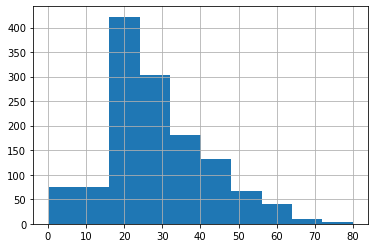

In [57]:
re_feature['Age'].hist()

<AxesSubplot:>

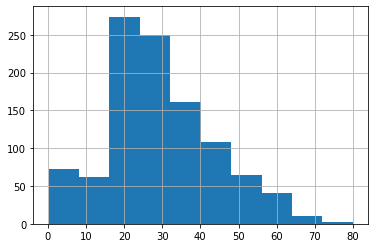

In [58]:
all_feature['Age'].hist()

In [59]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [60]:
X_train = re_feature.iloc[:891,:]
X_test = re_feature.iloc[891:,:]
y_train = train.iloc[:,1]

In [61]:
from sklearn.ensemble import RandomForestClassifier
Random_modle = RandomForestClassifier()
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)

1.0

In [62]:
summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = 4.predict(X_test)
summit.to_csv('Survived_predict.csv',index=False)

### XGBoost를 이용한 예측

In [52]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = xgb_wrapper.predict(X_test)
summit.to_csv('Survived_predict_with_XGB.csv',index=False)

### 랜덤서치를 이용한 하이퍼파라미터 튜닝

In [231]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
        'n_estimators': randint(low=100, high=600),
        'learning_rate': [0.01, 0.05, 0.1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6]
        }

random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=500, cv=5,
                                   scoring='f1_weighted', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train,y_train)

print("파라미터 결과 : {}".format(random_search.best_params_))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\dhjun\.conda\envs\DataScience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
파라미터 결과 : {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 403, 'subsample': 0.6}


In [232]:
hr_random_df = pd.DataFrame(random_search.cv_results_)
hr_random_df.loc[:, ['mean_score_time', "params"]].sort_values(by='mean_score_time',ascending=False)

,mean_score_time,params
263,0.030021,"{'colsample_bytree': 1.0, 'gamma': 0.5, 'learn..."
271,0.023852,"{'colsample_bytree': 0.8, 'gamma': 2, 'learnin..."
473,0.021596,"{'colsample_bytree': 1.0, 'gamma': 0.5, 'learn..."
349,0.020560,"{'colsample_bytree': 0.8, 'gamma': 5, 'learnin..."
446,0.020504,"{'colsample_bytree': 1.0, 'gamma': 1, 'learnin..."
...,...,...
0,0.006503,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin..."
307,0.006493,"{'colsample_bytree': 0.8, 'gamma': 1.5, 'learn..."
228,0.006250,"{'colsample_bytree': 0.6, 'gamma': 1.5, 'learn..."
23,0.006226,"{'colsample_bytree': 1.0, 'gamma': 1.5, 'learn..."


In [234]:
xgb_wrapper = XGBClassifier(n_estimators=403 ,learning_rate=0.05,
                            subsample=0.6, min_child_weight=5, max_depth=5,
                            gamma=0.5, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train)
summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = xgb_wrapper.predict(X_test)
summit.to_csv('Survived_predict_with_XGB.csv',index=False)